## Metodología Box Jenkins

In [12]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pmdarima

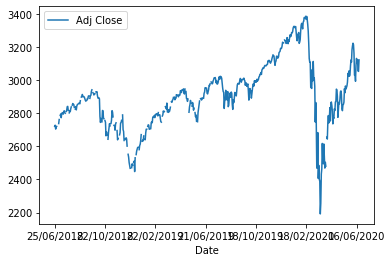

In [13]:
#Leer datos a utilizar
data=pd.read_csv('datos_pruebas1.csv', index_col = [0])
data.plot()

In [11]:
pmdarima.arima.ndiffs(data.dropna())

1

### Prueba de estacionariedad

In [108]:
#Definir si la serie a utilizar es o no es estacionaria
def get_stationarity(data):
    data = data['Adj Close']
    result = adfuller(data)
    p_value = result[1]
    ADF_statics = result[0]
    alpha = .05  # Es con un intervalo de confianza del 95%
    if p_value < alpha and ADF_statics < 0:
        v_est = 0
        return  v_est 
    else:
        v_est = 1
        return  v_est 

# v_est = 0, no es estacionaria, v_est = 1 es estacionaria
#hipótesis nula:la hipóteisis nula es que los datos son estacionarios 

In [109]:
v_est = get_stationarity(data.dropna())
v_est

0

### Obtener diferencias para volver la serie estacionaria

In [110]:
# Sacar diferencias y obtener d 

diferencia = data['Adj Close'].diff()
min_desv = diferencia.std()
serie = diferencia
d = 1
n_dif = 7

for i in range(1, n_dif):
    diferencia = diferencia.diff()
    desv = diferencia.std()
    if desv < min_desv :
        min_desv = desv
        serie = diferencia
        d = i 


In [111]:
# Volver a calcular estacionariedad a la nueva serie 
v_est = get_stationarity(pd.DataFrame(serie).dropna())
v_est

0